# Teoría del Portafolio Moderno

En este notebook, exploraremos la teoría del portafolio moderno utilizando Python. La teoría del portafolio moderno, desarrollada por Harry Markowitz en 1952, (artículo completo disponible en los archivos del curso de canvas) busca optimizar la selección de activos en un portafolio de inversiones al encontrar la combinación de activos que maximiza el rendimiento esperado para un nivel de riesgo dado o, alternativamente, minimiza el riesgo para un rendimiento esperado dado. La idea central es que la diversificación permite a los inversores reducir el riesgo de su portafolio sin sacrificar el rendimiento esperado.


In [1]:
# Importar bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime

## Obtención de datos de precios de acciones

Primero, seleccionaremos algunos símbolos de acciones para construir nuestro portafolio. En este ejemplo, utilizaremos acciones de Apple (AAPL), Microsoft (MSFT), Amazon (AMZN) y Google (GOOGL). Luego, obtendremos los datos de precios ajustados al cierre de estas acciones utilizando la biblioteca `yfinance`.


In [2]:
# Configurar las fechas de inicio y fin de los datos históricos
start_date = datetime.datetime(2018, 1, 1)
end_date = datetime.datetime.now()

# Listar algunos tickers de acciones para construir el portafolio 
# ejemplo: Apple, Microsoft, Amazon y Google
symbols = ['AAPL', 'MSFT', 'AMZN', 'GOOGL']

# Descargar datos de precios ajustados al cierre de las acciones seleccionadas
#data = pd.DataFrame({symbol: yf.download(symbol, start=start_date, end=end_date)['Adj Close'] for symbol in symbols})

# Opción c. Más eficiente
data=yf.download(' '.join(symbols), start=start_date, end=end_date, progress=False)['Adj Close']

# Opción con for:
#data = pd.DataFrame()
#for symbol in symbols:
    #data[symbol] = yf.download(symbol, start=start_date, end=end_date, progress=False)['Adj Close']

# Dato cultural: el mismo resultado podría obtenerse
# dict comprehension, que es similar a las famosas list comprehension  
# estas comprehension son más rápidas para muchos valores vs for
# aunque en este caso la diferencia en tiempo es insignificante
# la estructura en general es: 
### {clave: valor for elemento in iterable}

In [3]:
data.head()

,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2018-01-02,40.670971,59.450500,53.660500,80.080917
2018-01-03,40.663891,60.209999,54.576000,80.453598
2018-01-04,40.852776,60.479500,54.787998,81.161713
2018-01-05,41.317898,61.457001,55.514500,82.167961
2018-01-08,41.164436,62.343498,55.710499,82.251801


## Calcular rendimientos diarios y estadísticas de portafolio

Ahora calcularemos los rendimientos diarios de las acciones y luego utilizaremos estos rendimientos para calcular los rendimientos anuales esperados y la matriz de covarianza. 

Estos son elementos clave para aplicar la teoría del portafolio moderno.


In [4]:
# Calcular los rendimientos diarios de las acciones
daily_returns = data.pct_change().dropna()
daily_returns.head()

,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2018-01-03,-0.000174,0.012775,0.017061,0.004654
2018-01-04,0.004645,0.004476,0.003884,0.008802
2018-01-05,0.011385,0.016163,0.013260,0.012398
2018-01-08,-0.003714,0.014425,0.003531,0.001020
2018-01-09,-0.000115,0.004676,-0.001274,-0.000680


Calcular los rendimientos anuales esperados y la matriz de covarianza

El número 252 representa la cantidad típica de días hábiles en un año en los mercados financieros de EE. UU. Al multiplicar el rendimiento promedio diario por 252, se convierte el rendimiento promedio diario en un rendimiento anualizado. La idea detrás de esta conversión es proyectar cómo se comportarían los rendimientos si los rendimientos promedio diarios se mantuvieran constantes a lo largo de un año completo de negociación.


En la práctica, el rendimiento de las inversiones se compone a lo largo del tiempo, lo que significa que los rendimientos generados en un periodo de tiempo se reinvierten y también generan rendimientos adicionales en periodos futuros. La fórmula que hemos utilizado para calcular los rendimientos anuales esperados asume un rendimiento simple, no compuesto. 

Si quisieras podrías usar algo como:

`annual_expected_returns_compounded = (1 + daily_returns.mean()) ** 252 - 1`

Sin embargo, es importante tener en cuenta que para fines prácticos y en el contexto de la teoría del portafolio moderno, la diferencia entre el uso de rendimientos simples o compuestos suele ser bastante pequeña. Además, la optimización de portafolios generalmente se realiza con base en expectativas de rendimiento, riesgo y correlaciones, y no en rendimientos históricos. 

Entonces, aunque los rendimientos compuestos serían una aproximación más precisa, en la mayoría de los casos, los rendimientos simples son suficientes para analizar y optimizar portafolios en términos generales.

`daily_returns.cov()` calcula la matriz de covarianza de los rendimientos diarios de las acciones. La covarianza es una medida estadística que indica cómo dos variables se mueven juntas. En este caso, nos interesa saber cómo los rendimientos de las acciones en el portafolio se mueven juntos. Si la covarianza entre dos acciones es positiva, significa que tienden a moverse en la misma dirección, mientras que si es negativa, tienden a moverse en direcciones opuestas. Una covarianza cercana a cero indica que no hay una relación clara entre los movimientos de las dos acciones.

Esta conversión es válida y se basa en el supuesto de que los rendimientos diarios son independientes y siguen una distribución normal. Bajo este supuesto, la varianza y la covarianza se pueden escalar linealmente con el tiempo. Entonces, para convertir la matriz de covarianza diaria en anual, simplemente multiplicamos por la cantidad de días de negociación en un año (252).

In [5]:
# Calcular los rendimientos anuales esperados y la matriz de covarianza
annual_expected_returns = daily_returns.mean() * 252
covariance_matrix = daily_returns.cov() * 252

In [6]:
annual_expected_returns

AAPL     0.287202
AMZN     0.241639
GOOGL    0.228667
MSFT     0.301035
dtype: float64

In [7]:
covariance_matrix.head()

,AAPL,AMZN,GOOGL,MSFT
AAPL,0.098038,0.067307,0.064408,0.068801
AMZN,0.067307,0.122234,0.072491,0.072450
GOOGL,0.064408,0.072491,0.097794,0.070311
MSFT,0.068801,0.072450,0.070311,0.088054


## Generar portafolios aleatorios

Generaremos un gran número de portafolios aleatorios utilizando diferentes combinaciones de pesos para las acciones seleccionadas. Para cada portafolio, calcularemos el rendimiento esperado y la volatilidad (desviación estándar) del portafolio. Luego, graficaremos estos portafolios en un gráfico de rendimiento esperado frente a volatilidad para visualizar la frontera eficiente.


Explicación detallada:
`num_portfolios` Esta línea establece el número de portafolios aleatorios que se generarán. En este caso, se generarán 5,000 portafolios aleatorios con diferentes combinaciones de ponderaciones para las acciones en el portafolio. Aumentar el número de portafolios generados permite explorar un espacio más amplio de posibles combinaciones de ponderaciones, lo que podría ayudar a encontrar un portafolio óptimo más preciso. Sin embargo, también puede aumentar el tiempo de cálculo.

`weights_arr = np.zeros((num_portfolios, len(symbols)))` Esta línea crea una matriz de ceros con num_portfolios filas y len(symbols) columnas. Cada fila de la matriz representará un portafolio aleatorio, y cada columna representará el peso de una acción en el portafolio. La matriz se llenará con los pesos generados aleatoriamente para cada portafolio en el bucle que sigue.

`returns_arr = np.zeros(num_portfolios)` Esta línea crea un array de ceros con una longitud igual a num_portfolios. Este array se utilizará para almacenar el rendimiento esperado de cada portafolio aleatorio generado. Para cada portafolio, se calculará su rendimiento esperado en función de los pesos y los rendimientos anuales esperados de las acciones y se almacenará en este array.

`volatility_arr = np.zeros(num_portfolios)` Esta línea crea un array de ceros con una longitud igual a num_portfolios. Este array se utilizará para almacenar la volatilidad (desviación estándar) de cada portafolio aleatorio generado. Para cada portafolio, se calculará su volatilidad en función de los pesos y la matriz de covarianza anualizada de las acciones y se almacenará en este array.

Estas estructuras de datos almacenarán los pesos, los rendimientos esperados y las volatilidades de los portafolios generados, lo que permitirá identificar y seleccionar el portafolio óptimo según los criterios deseados (por ejemplo, maximizar el índice de Sharpe).

In [8]:
# Generar un gran número de portafolios aleatorios
num_portfolios = 5000 #
weights_arr = np.zeros((num_portfolios, len(symbols))) #Matriz de 0s de 5000 filas x 4 columnas
returns_arr = np.zeros(num_portfolios) # array de 5000 elementos
volatility_arr = np.zeros(num_portfolios) 

np.random.seed(42)  # Establecer una semilla para la reproducibilidad

El siguiente bloque genera los pesos, rendimientos y volatilidades de los n portafolios generados.

Respecto a :
`portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))`

Esta línea de código calcula la volatilidad (desviación estándar) del portafolio en función de los pesos de las acciones en el portafolio y la matriz de covarianza anualizada de los rendimientos de las acciones.

La fórmula para calcular la volatilidad del portafolio es:

`portfolio_volatility = sqrt(weights^T * covariance_matrix * weights)`

Donde:

- weights es un vector columna que contiene los pesos de las acciones en el portafolio.
- covariance_matrix es la matriz de covarianza anualizada de los rendimientos de las acciones.
- weights^T es la transpuesta del vector de pesos.
 
Explicación de la línea de código:

`np.dot(covariance_matrix, weights)`: Esta operación realiza la multiplicación matricial entre la matriz de covarianza y el vector de pesos. El resultado es un vector columna.

`np.dot(weights.T, ...)`: Esta operación realiza la multiplicación matricial entre la transpuesta del vector de pesos y el vector columna resultado del paso anterior. El resultado es un escalar que representa la varianza del portafolio.

`np.sqrt(...)`: Finalmente, aplicamos la raíz cuadrada al escalar resultante para obtener la volatilidad (desviación estándar) del portafolio.

In [9]:
for i in range(num_portfolios):
    # Generar pesos aleatorios y normalizarlos para que sumen 1
    weights = np.random.random(len(symbols))
    weights /= np.sum(weights)

    # Calcular el rendimiento y la volatilidad esperados del portafolio
    portfolio_return = np.dot(weights, annual_expected_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))

    # Almacenar los resultados en los arrays correspondientes
    weights_arr[i, :] = weights #pesos generados del port. i
    returns_arr[i] = portfolio_return #rendimientos generados port. i
    volatility_arr[i] = portfolio_volatility #volatilidad gen. port. i

# Crear un DataFrame con los resultados de los portafolios
portfolios = pd.DataFrame({'Volatility': volatility_arr, 'Return': returns_arr})
for i, symbol in enumerate(symbols): # La caracterisitca de enumerate es que además de iterar le asigna su numerito a cada iteración
    portfolios[symbol + ' Weight'] = weights_arr[:, i]

In [10]:
#for symbol in enumerate (symbols):
    #print(1)

In [11]:
portfolios

,Volatility,Return,AAPL Weight,MSFT Weight,AMZN Weight,GOOGL Weight
0,0.283588,0.257877,0.141022,0.357962,0.275610,0.225406
1,0.283410,0.288395,0.126201,0.126181,0.046983,0.700635
2,0.282860,0.278483,0.261391,0.307900,0.008951,0.421758
3,0.283573,0.274591,0.590380,0.150594,0.128953,0.130073
4,0.282121,0.258104,0.196011,0.338079,0.278284,0.187627
...,...,...,...,...,...,...
4995,0.278096,0.260957,0.351153,0.184478,0.335273,0.129095
4996,0.283737,0.264839,0.138560,0.365429,0.173752,0.322259
4997,0.285080,0.260862,0.093931,0.376606,0.228066,0.301397
4998,0.281933,0.260486,0.037926,0.208733,0.381754,0.371586


In [12]:
weights

array([0.04845678, 0.314356  , 0.45887721, 0.17831001])

In [13]:
annual_expected_returns

AAPL     0.287202
AMZN     0.241639
GOOGL    0.228667
MSFT     0.301035
dtype: float64

In [14]:
np.dot(annual_expected_returns, weights)

0.24848506510873639

In [15]:
np.dot(weights, annual_expected_returns)

0.24848506510873639

In [16]:
weights_arr[i, :] = weights
len(weights_arr)
len(returns_arr)

5000

In [17]:
# weights
# annual_expected_returns
# np.dot(weights, annual_expected_returns)

# producto cruz y producto punto no es lo mismo. Producto punto es la normalita

## Graficar la frontera eficiente

Ahora que hemos generado una serie de portafolios aleatorios, podemos graficarlos en un gráfico de rendimiento esperado frente a volatilidad. Esto nos permite visualizar la frontera eficiente, que es el conjunto de portafolios que ofrecen la máxima rentabilidad posible para un nivel de riesgo dado.


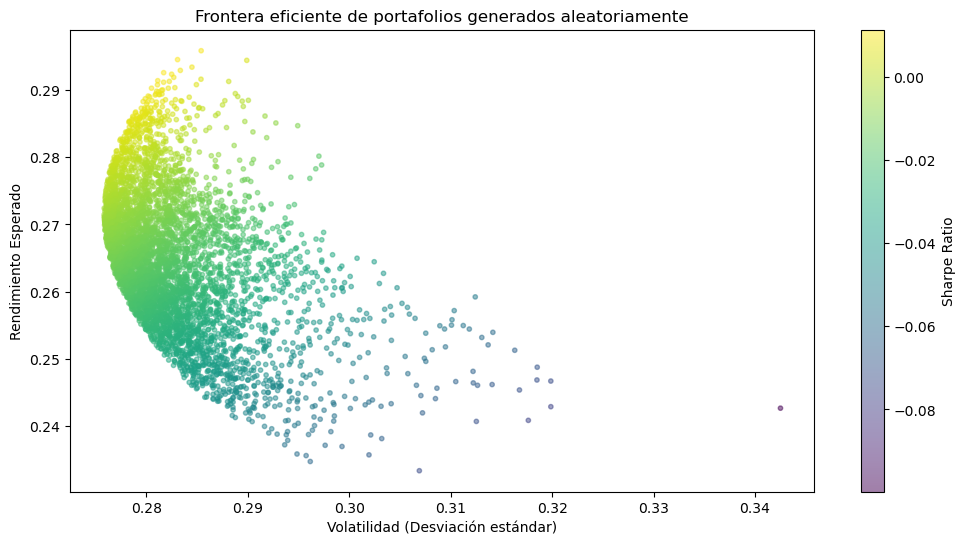

In [18]:
# Graficar la frontera eficiente de los portafolios generados
plt.figure(figsize=(12, 6))
plt.scatter(portfolios['Volatility'], portfolios['Return'], c=(portfolios['Return'] - portfolios['Volatility']), cmap='viridis', marker='o', s=10, alpha=0.5)
plt.colorbar(label='Sharpe Ratio') # Según yo y lo que aprendí de Portafolios de Inversión, esto no es el Sharpe Ratio
plt.xlabel('Volatilidad (Desviación estándar)')
plt.ylabel('Rendimiento Esperado')
plt.title('Frontera eficiente de portafolios generados aleatoriamente')
plt.grid(False)
plt.show()

# c = array-like or list of colors or color, optional

## Encontrar el portafolio óptimo

El portafolio óptimo es aquel que ofrece la mejor relación riesgo-rendimiento, que se mide a través del índice de Sharpe. El índice de Sharpe se calcula dividiendo el exceso de rendimiento del portafolio (rendimiento del portafolio menos la tasa libre de riesgo) por la volatilidad del portafolio. Un índice de Sharpe más alto indica un mejor equilibrio entre riesgo y rendimiento.

Vamos a calcular el índice de Sharpe para cada portafolio y encontrar el portafolio con el mayor índice de Sharpe.


In [13]:
# Establecer una tasa libre de riesgo (puedes ajustarla según las condiciones del mercado)
risk_free_rate = 0.06

# Calcular el índice de Sharpe para cada portafolio
sharpe_ratios = (portfolios['Return'] - risk_free_rate) / portfolios['Volatility']

# Encontrar el portafolio con el mayor índice de Sharpe
max_sharpe_idx = sharpe_ratios.idxmax()
max_sharpe_portfolio = portfolios.loc[max_sharpe_idx]

print("Portafolio óptimo (mayor índice de Sharpe):")
print(max_sharpe_portfolio)


Portafolio óptimo (mayor índice de Sharpe):
Volatility      0.301333
Return          0.305644
AAPL Weight     0.514814
MSFT Weight     0.005948
AMZN Weight     0.002289
GOOGL Weight    0.476948
Name: 3920, dtype: float64


In [49]:
#portfolios.loc[max_sharpe_idx]

## Graficar la frontera eficiente con el portafolio óptimo

Finalmente, vamos a graficar la frontera eficiente junto con el portafolio óptimo. El portafolio óptimo se destacará con un marcador de estrella roja en el gráfico de rendimiento esperado frente a volatilidad.


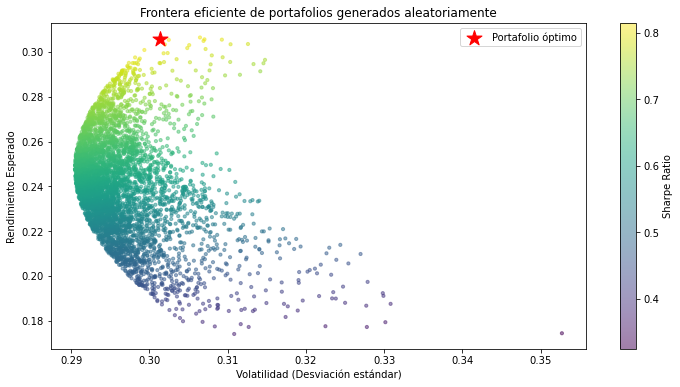

In [14]:
# Graficar la frontera eficiente junto con el portafolio óptimo
plt.figure(figsize=(12, 6))
plt.scatter(portfolios['Volatility'], portfolios['Return'], c=sharpe_ratios, cmap='viridis', marker='o', s=10, alpha=0.5)
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_portfolio['Volatility'], max_sharpe_portfolio['Return'], c='red', marker='*', s=250, label='Portafolio óptimo')
plt.xlabel('Volatilidad (Desviación estándar)')
plt.ylabel('Rendimiento Esperado')
plt.title('Frontera eficiente de portafolios generados aleatoriamente')
plt.legend()
plt.grid(False)
plt.show()
